## ORB Feature Extraction

In [2]:
#packages,libraries and modules imported and used
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
folder=r"C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl"
for file in os.listdir(folder):
    dest=os.path.join(folder,file)
    for filename in os.listdir(dest):
        path=os.path.join(dest,filename)
        print(path)

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_11.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_12.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_13.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_14.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_15.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_16.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_17.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_18.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_5.jp

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_67_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_67_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_67_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_67_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_67_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_67_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_67_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_67_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_68_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_68_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_68_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_68_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_68_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_68_rotate_5.jpeg
C:\Us

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\a\a_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_14_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_14_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_14_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_14_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_15_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_15_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_15_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_15_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_15_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_15_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_15_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_15_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_15_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_15_rotate_9.jpeg
C:\Us

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_15_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_15_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_15_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_15_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_15_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_15_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_15_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_15_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_16_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_16_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_16_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_16_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_16_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_16_rotate_5.jpeg
C:\Us

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_12_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_12_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_12_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_12_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_12_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_12_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_12_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_12_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_12_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_12_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_13_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_13_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_13_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_13_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_11_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_11_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_11_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_11_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_11_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_12_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_12_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_12_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_12_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_12_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_12_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_12_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_12_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_12_rotate_8.jpeg
C:\Us

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_11_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_11_rotate_4.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_12_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_13_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_13_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_13_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_13_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_13_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_13_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_13_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_13_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_13_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_13_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_14_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_14_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_14_rotate_2.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_11_rotate_3.jpeg
C:\U

In [3]:
folder=r"C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl"

i=1
for file in os.listdir(folder):
    dest=os.path.join(folder,file)
    k=1
    print(file)
    for filename in os.listdir(dest):
        if(k>100):
            print("___________________")
            break
        path=os.path.join(dest,filename)
        a=cv2.imread(path)
    
        #resize image
        resize=(512,512)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        #ORB feature extraction
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(gray, None)
    
        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",i," : ", out.shape)
        i=i+1
        k=k+1
        csv_data=out.to_csv('ORB.csv', mode='a', header=False,index=False)



0
descriptor shape  1  :  (236, 32)
descriptor shape  2  :  (239, 32)
descriptor shape  3  :  (257, 32)
descriptor shape  4  :  (263, 32)
descriptor shape  5  :  (249, 32)
descriptor shape  6  :  (220, 32)
descriptor shape  7  :  (227, 32)
descriptor shape  8  :  (242, 32)
descriptor shape  9  :  (227, 32)
descriptor shape  10  :  (239, 32)
descriptor shape  11  :  (250, 32)
descriptor shape  12  :  (286, 32)
descriptor shape  13  :  (284, 32)
descriptor shape  14  :  (261, 32)
descriptor shape  15  :  (377, 32)
descriptor shape  16  :  (263, 32)
descriptor shape  17  :  (220, 32)
descriptor shape  18  :  (242, 32)
descriptor shape  19  :  (350, 32)
descriptor shape  20  :  (342, 32)
descriptor shape  21  :  (377, 32)
descriptor shape  22  :  (394, 32)
descriptor shape  23  :  (376, 32)
descriptor shape  24  :  (389, 32)
descriptor shape  25  :  (358, 32)
descriptor shape  26  :  (361, 32)
descriptor shape  27  :  (377, 32)
descriptor shape  28  :  (342, 32)
descriptor shape  29  :  (3

descriptor shape  236  :  (500, 32)
descriptor shape  237  :  (500, 32)
descriptor shape  238  :  (500, 32)
descriptor shape  239  :  (494, 32)
descriptor shape  240  :  (500, 32)
descriptor shape  241  :  (500, 32)
descriptor shape  242  :  (500, 32)
descriptor shape  243  :  (500, 32)
descriptor shape  244  :  (500, 32)
descriptor shape  245  :  (500, 32)
descriptor shape  246  :  (500, 32)
descriptor shape  247  :  (500, 32)
descriptor shape  248  :  (500, 32)
descriptor shape  249  :  (483, 32)
descriptor shape  250  :  (500, 32)
descriptor shape  251  :  (495, 32)
descriptor shape  252  :  (500, 32)
descriptor shape  253  :  (500, 32)
descriptor shape  254  :  (500, 32)
descriptor shape  255  :  (490, 32)
descriptor shape  256  :  (500, 32)
descriptor shape  257  :  (500, 32)
descriptor shape  258  :  (500, 32)
descriptor shape  259  :  (493, 32)
descriptor shape  260  :  (500, 32)
descriptor shape  261  :  (360, 32)
descriptor shape  262  :  (355, 32)
descriptor shape  263  :  (3

descriptor shape  469  :  (404, 32)
descriptor shape  470  :  (427, 32)
descriptor shape  471  :  (357, 32)
descriptor shape  472  :  (348, 32)
descriptor shape  473  :  (356, 32)
descriptor shape  474  :  (399, 32)
descriptor shape  475  :  (343, 32)
descriptor shape  476  :  (447, 32)
descriptor shape  477  :  (469, 32)
descriptor shape  478  :  (459, 32)
descriptor shape  479  :  (379, 32)
descriptor shape  480  :  (423, 32)
descriptor shape  481  :  (401, 32)
descriptor shape  482  :  (387, 32)
descriptor shape  483  :  (420, 32)
descriptor shape  484  :  (415, 32)
descriptor shape  485  :  (383, 32)
descriptor shape  486  :  (453, 32)
descriptor shape  487  :  (485, 32)
descriptor shape  488  :  (452, 32)
descriptor shape  489  :  (365, 32)
descriptor shape  490  :  (438, 32)
descriptor shape  491  :  (390, 32)
descriptor shape  492  :  (396, 32)
descriptor shape  493  :  (400, 32)
descriptor shape  494  :  (393, 32)
descriptor shape  495  :  (356, 32)
descriptor shape  496  :  (4

descriptor shape  701  :  (370, 32)
descriptor shape  702  :  (379, 32)
descriptor shape  703  :  (407, 32)
descriptor shape  704  :  (396, 32)
descriptor shape  705  :  (401, 32)
descriptor shape  706  :  (422, 32)
descriptor shape  707  :  (461, 32)
descriptor shape  708  :  (424, 32)
descriptor shape  709  :  (374, 32)
descriptor shape  710  :  (357, 32)
descriptor shape  711  :  (500, 32)
descriptor shape  712  :  (500, 32)
descriptor shape  713  :  (487, 32)
descriptor shape  714  :  (500, 32)
descriptor shape  715  :  (471, 32)
descriptor shape  716  :  (500, 32)
descriptor shape  717  :  (500, 32)
descriptor shape  718  :  (500, 32)
descriptor shape  719  :  (483, 32)
descriptor shape  720  :  (500, 32)
descriptor shape  721  :  (500, 32)
descriptor shape  722  :  (500, 32)
descriptor shape  723  :  (500, 32)
descriptor shape  724  :  (500, 32)
descriptor shape  725  :  (488, 32)
descriptor shape  726  :  (500, 32)
descriptor shape  727  :  (500, 32)
descriptor shape  728  :  (5

descriptor shape  933  :  (500, 32)
descriptor shape  934  :  (500, 32)
descriptor shape  935  :  (470, 32)
descriptor shape  936  :  (500, 32)
descriptor shape  937  :  (500, 32)
descriptor shape  938  :  (500, 32)
descriptor shape  939  :  (499, 32)
descriptor shape  940  :  (500, 32)
descriptor shape  941  :  (500, 32)
descriptor shape  942  :  (500, 32)
descriptor shape  943  :  (496, 32)
descriptor shape  944  :  (498, 32)
descriptor shape  945  :  (465, 32)
descriptor shape  946  :  (500, 32)
descriptor shape  947  :  (500, 32)
descriptor shape  948  :  (495, 32)
descriptor shape  949  :  (486, 32)
descriptor shape  950  :  (496, 32)
descriptor shape  951  :  (499, 32)
descriptor shape  952  :  (500, 32)
descriptor shape  953  :  (492, 32)
descriptor shape  954  :  (496, 32)
descriptor shape  955  :  (479, 32)
descriptor shape  956  :  (500, 32)
descriptor shape  957  :  (500, 32)
descriptor shape  958  :  (498, 32)
descriptor shape  959  :  (478, 32)
descriptor shape  960  :  (5

descriptor shape  1161  :  (500, 32)
descriptor shape  1162  :  (500, 32)
descriptor shape  1163  :  (500, 32)
descriptor shape  1164  :  (498, 32)
descriptor shape  1165  :  (477, 32)
descriptor shape  1166  :  (498, 32)
descriptor shape  1167  :  (500, 32)
descriptor shape  1168  :  (500, 32)
descriptor shape  1169  :  (500, 32)
descriptor shape  1170  :  (500, 32)
descriptor shape  1171  :  (470, 32)
descriptor shape  1172  :  (463, 32)
descriptor shape  1173  :  (432, 32)
descriptor shape  1174  :  (458, 32)
descriptor shape  1175  :  (374, 32)
descriptor shape  1176  :  (453, 32)
descriptor shape  1177  :  (455, 32)
descriptor shape  1178  :  (433, 32)
descriptor shape  1179  :  (415, 32)
descriptor shape  1180  :  (490, 32)
descriptor shape  1181  :  (500, 32)
descriptor shape  1182  :  (500, 32)
descriptor shape  1183  :  (500, 32)
descriptor shape  1184  :  (500, 32)
descriptor shape  1185  :  (481, 32)
descriptor shape  1186  :  (490, 32)
descriptor shape  1187  :  (500, 32)
d

descriptor shape  1389  :  (500, 32)
descriptor shape  1390  :  (500, 32)
descriptor shape  1391  :  (447, 32)
descriptor shape  1392  :  (458, 32)
descriptor shape  1393  :  (408, 32)
descriptor shape  1394  :  (444, 32)
descriptor shape  1395  :  (377, 32)
descriptor shape  1396  :  (447, 32)
descriptor shape  1397  :  (482, 32)
descriptor shape  1398  :  (446, 32)
descriptor shape  1399  :  (406, 32)
descriptor shape  1400  :  (424, 32)
___________________
e
descriptor shape  1401  :  (488, 32)
descriptor shape  1402  :  (494, 32)
descriptor shape  1403  :  (500, 32)
descriptor shape  1404  :  (500, 32)
descriptor shape  1405  :  (461, 32)
descriptor shape  1406  :  (500, 32)
descriptor shape  1407  :  (500, 32)
descriptor shape  1408  :  (500, 32)
descriptor shape  1409  :  (486, 32)
descriptor shape  1410  :  (500, 32)
descriptor shape  1411  :  (500, 32)
descriptor shape  1412  :  (500, 32)
descriptor shape  1413  :  (500, 32)
descriptor shape  1414  :  (500, 32)
descriptor shape

descriptor shape  1611  :  (469, 32)
descriptor shape  1612  :  (464, 32)
descriptor shape  1613  :  (474, 32)
descriptor shape  1614  :  (491, 32)
descriptor shape  1615  :  (474, 32)
descriptor shape  1616  :  (500, 32)
descriptor shape  1617  :  (500, 32)
descriptor shape  1618  :  (491, 32)
descriptor shape  1619  :  (450, 32)
descriptor shape  1620  :  (486, 32)
descriptor shape  1621  :  (464, 32)
descriptor shape  1622  :  (480, 32)
descriptor shape  1623  :  (454, 32)
descriptor shape  1624  :  (493, 32)
descriptor shape  1625  :  (472, 32)
descriptor shape  1626  :  (500, 32)
descriptor shape  1627  :  (500, 32)
descriptor shape  1628  :  (495, 32)
descriptor shape  1629  :  (454, 32)
descriptor shape  1630  :  (474, 32)
descriptor shape  1631  :  (472, 32)
descriptor shape  1632  :  (482, 32)
descriptor shape  1633  :  (455, 32)
descriptor shape  1634  :  (492, 32)
descriptor shape  1635  :  (499, 32)
descriptor shape  1636  :  (500, 32)
descriptor shape  1637  :  (500, 32)
d

descriptor shape  1837  :  (500, 32)
descriptor shape  1838  :  (500, 32)
descriptor shape  1839  :  (500, 32)
descriptor shape  1840  :  (500, 32)
descriptor shape  1841  :  (500, 32)
descriptor shape  1842  :  (500, 32)
descriptor shape  1843  :  (500, 32)
descriptor shape  1844  :  (500, 32)
descriptor shape  1845  :  (500, 32)
descriptor shape  1846  :  (500, 32)
descriptor shape  1847  :  (500, 32)
descriptor shape  1848  :  (500, 32)
descriptor shape  1849  :  (500, 32)
descriptor shape  1850  :  (500, 32)
descriptor shape  1851  :  (500, 32)
descriptor shape  1852  :  (500, 32)
descriptor shape  1853  :  (500, 32)
descriptor shape  1854  :  (500, 32)
descriptor shape  1855  :  (500, 32)
descriptor shape  1856  :  (500, 32)
descriptor shape  1857  :  (500, 32)
descriptor shape  1858  :  (500, 32)
descriptor shape  1859  :  (500, 32)
descriptor shape  1860  :  (500, 32)
descriptor shape  1861  :  (500, 32)
descriptor shape  1862  :  (500, 32)
descriptor shape  1863  :  (500, 32)
d

descriptor shape  2062  :  (500, 32)
descriptor shape  2063  :  (491, 32)
descriptor shape  2064  :  (496, 32)
descriptor shape  2065  :  (475, 32)
descriptor shape  2066  :  (492, 32)
descriptor shape  2067  :  (500, 32)
descriptor shape  2068  :  (500, 32)
descriptor shape  2069  :  (483, 32)
descriptor shape  2070  :  (500, 32)
descriptor shape  2071  :  (500, 32)
descriptor shape  2072  :  (500, 32)
descriptor shape  2073  :  (475, 32)
descriptor shape  2074  :  (494, 32)
descriptor shape  2075  :  (473, 32)
descriptor shape  2076  :  (498, 32)
descriptor shape  2077  :  (500, 32)
descriptor shape  2078  :  (500, 32)
descriptor shape  2079  :  (500, 32)
descriptor shape  2080  :  (498, 32)
descriptor shape  2081  :  (500, 32)
descriptor shape  2082  :  (497, 32)
descriptor shape  2083  :  (476, 32)
descriptor shape  2084  :  (490, 32)
descriptor shape  2085  :  (490, 32)
descriptor shape  2086  :  (496, 32)
descriptor shape  2087  :  (500, 32)
descriptor shape  2088  :  (489, 32)
d

descriptor shape  2293  :  (500, 32)
descriptor shape  2294  :  (500, 32)
descriptor shape  2295  :  (500, 32)
descriptor shape  2296  :  (500, 32)
descriptor shape  2297  :  (500, 32)
descriptor shape  2298  :  (500, 32)
descriptor shape  2299  :  (500, 32)
descriptor shape  2300  :  (500, 32)
___________________
n
descriptor shape  2301  :  (385, 32)
descriptor shape  2302  :  (369, 32)
descriptor shape  2303  :  (384, 32)
descriptor shape  2304  :  (449, 32)
descriptor shape  2305  :  (379, 32)
descriptor shape  2306  :  (438, 32)
descriptor shape  2307  :  (412, 32)
descriptor shape  2308  :  (394, 32)
descriptor shape  2309  :  (340, 32)
descriptor shape  2310  :  (385, 32)
descriptor shape  2311  :  (452, 32)
descriptor shape  2312  :  (430, 32)
descriptor shape  2313  :  (500, 32)
descriptor shape  2314  :  (500, 32)
descriptor shape  2315  :  (494, 32)
descriptor shape  2316  :  (473, 32)
descriptor shape  2317  :  (500, 32)
descriptor shape  2318  :  (450, 32)
descriptor shape

descriptor shape  2524  :  (465, 32)
descriptor shape  2525  :  (469, 32)
descriptor shape  2526  :  (478, 32)
descriptor shape  2527  :  (487, 32)
descriptor shape  2528  :  (480, 32)
descriptor shape  2529  :  (426, 32)
descriptor shape  2530  :  (423, 32)
descriptor shape  2531  :  (403, 32)
descriptor shape  2532  :  (385, 32)
descriptor shape  2533  :  (409, 32)
descriptor shape  2534  :  (458, 32)
descriptor shape  2535  :  (439, 32)
descriptor shape  2536  :  (482, 32)
descriptor shape  2537  :  (480, 32)
descriptor shape  2538  :  (459, 32)
descriptor shape  2539  :  (417, 32)
descriptor shape  2540  :  (384, 32)
descriptor shape  2541  :  (420, 32)
descriptor shape  2542  :  (433, 32)
descriptor shape  2543  :  (425, 32)
descriptor shape  2544  :  (460, 32)
descriptor shape  2545  :  (457, 32)
descriptor shape  2546  :  (468, 32)
descriptor shape  2547  :  (484, 32)
descriptor shape  2548  :  (441, 32)
descriptor shape  2549  :  (445, 32)
descriptor shape  2550  :  (448, 32)
d

descriptor shape  2751  :  (500, 32)
descriptor shape  2752  :  (500, 32)
descriptor shape  2753  :  (500, 32)
descriptor shape  2754  :  (500, 32)
descriptor shape  2755  :  (500, 32)
descriptor shape  2756  :  (500, 32)
descriptor shape  2757  :  (500, 32)
descriptor shape  2758  :  (500, 32)
descriptor shape  2759  :  (500, 32)
descriptor shape  2760  :  (500, 32)
descriptor shape  2761  :  (500, 32)
descriptor shape  2762  :  (500, 32)
descriptor shape  2763  :  (500, 32)
descriptor shape  2764  :  (500, 32)
descriptor shape  2765  :  (500, 32)
descriptor shape  2766  :  (500, 32)
descriptor shape  2767  :  (500, 32)
descriptor shape  2768  :  (500, 32)
descriptor shape  2769  :  (500, 32)
descriptor shape  2770  :  (500, 32)
descriptor shape  2771  :  (500, 32)
descriptor shape  2772  :  (500, 32)
descriptor shape  2773  :  (500, 32)
descriptor shape  2774  :  (500, 32)
descriptor shape  2775  :  (500, 32)
descriptor shape  2776  :  (500, 32)
descriptor shape  2777  :  (500, 32)
d

descriptor shape  2979  :  (500, 32)
descriptor shape  2980  :  (500, 32)
descriptor shape  2981  :  (500, 32)
descriptor shape  2982  :  (500, 32)
descriptor shape  2983  :  (500, 32)
descriptor shape  2984  :  (500, 32)
descriptor shape  2985  :  (500, 32)
descriptor shape  2986  :  (500, 32)
descriptor shape  2987  :  (500, 32)
descriptor shape  2988  :  (500, 32)
descriptor shape  2989  :  (500, 32)
descriptor shape  2990  :  (500, 32)
descriptor shape  2991  :  (500, 32)
descriptor shape  2992  :  (500, 32)
descriptor shape  2993  :  (500, 32)
descriptor shape  2994  :  (500, 32)
descriptor shape  2995  :  (500, 32)
descriptor shape  2996  :  (500, 32)
descriptor shape  2997  :  (500, 32)
descriptor shape  2998  :  (500, 32)
descriptor shape  2999  :  (500, 32)
descriptor shape  3000  :  (500, 32)
___________________
u
descriptor shape  3001  :  (500, 32)
descriptor shape  3002  :  (500, 32)
descriptor shape  3003  :  (500, 32)
descriptor shape  3004  :  (500, 32)
descriptor shape

descriptor shape  3203  :  (500, 32)
descriptor shape  3204  :  (500, 32)
descriptor shape  3205  :  (500, 32)
descriptor shape  3206  :  (500, 32)
descriptor shape  3207  :  (500, 32)
descriptor shape  3208  :  (500, 32)
descriptor shape  3209  :  (491, 32)
descriptor shape  3210  :  (500, 32)
descriptor shape  3211  :  (500, 32)
descriptor shape  3212  :  (500, 32)
descriptor shape  3213  :  (500, 32)
descriptor shape  3214  :  (500, 32)
descriptor shape  3215  :  (500, 32)
descriptor shape  3216  :  (500, 32)
descriptor shape  3217  :  (500, 32)
descriptor shape  3218  :  (500, 32)
descriptor shape  3219  :  (500, 32)
descriptor shape  3220  :  (500, 32)
descriptor shape  3221  :  (500, 32)
descriptor shape  3222  :  (500, 32)
descriptor shape  3223  :  (500, 32)
descriptor shape  3224  :  (500, 32)
descriptor shape  3225  :  (500, 32)
descriptor shape  3226  :  (500, 32)
descriptor shape  3227  :  (500, 32)
descriptor shape  3228  :  (500, 32)
descriptor shape  3229  :  (487, 32)
d

descriptor shape  3424  :  (493, 32)
descriptor shape  3425  :  (407, 32)
descriptor shape  3426  :  (480, 32)
descriptor shape  3427  :  (495, 32)
descriptor shape  3428  :  (488, 32)
descriptor shape  3429  :  (422, 32)
descriptor shape  3430  :  (476, 32)
descriptor shape  3431  :  (444, 32)
descriptor shape  3432  :  (443, 32)
descriptor shape  3433  :  (476, 32)
descriptor shape  3434  :  (492, 32)
descriptor shape  3435  :  (462, 32)
descriptor shape  3436  :  (489, 32)
descriptor shape  3437  :  (498, 32)
descriptor shape  3438  :  (478, 32)
descriptor shape  3439  :  (453, 32)
descriptor shape  3440  :  (484, 32)
descriptor shape  3441  :  (422, 32)
descriptor shape  3442  :  (445, 32)
descriptor shape  3443  :  (417, 32)
descriptor shape  3444  :  (482, 32)
descriptor shape  3445  :  (414, 32)
descriptor shape  3446  :  (486, 32)
descriptor shape  3447  :  (492, 32)
descriptor shape  3448  :  (481, 32)
descriptor shape  3449  :  (436, 32)
descriptor shape  3450  :  (447, 32)
d

In [3]:
#Feature vector of Dogs Dataset
data= pd.read_csv(r'ORB.csv',header=None,dtype='uint8')#,dtype='uint8'
data=data.astype(np.uint8)

#shape
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,126,116,118,252,111,127,126,200,63,246,...,251,221,191,251,143,191,183,124,111,215
1,254,41,230,158,173,214,190,200,191,254,...,251,242,187,243,143,187,7,124,63,86
2,250,45,166,158,173,91,254,238,191,180,...,203,248,191,115,223,179,23,124,125,206
3,124,240,125,242,45,205,89,216,175,60,...,251,181,223,219,103,123,194,136,70,115
4,31,110,246,255,175,63,252,200,191,178,...,239,240,148,250,207,182,231,253,67,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679283,11,223,251,213,118,222,255,246,125,206,...,37,239,102,127,190,128,111,212,103,253
1679284,232,169,189,250,141,221,85,143,203,21,...,242,177,203,217,212,123,210,76,214,106
1679285,191,247,105,166,154,23,159,248,131,224,...,60,254,58,77,173,188,63,183,43,213
1679286,92,144,157,242,169,236,17,7,174,31,...,155,48,201,243,94,95,128,64,133,98


## Kmeans

In [4]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(data)
        #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
        wcss.append(kmeans.inertia_) 
        print(i,":",kmeans.inertia_)

1 : 288707538758.64636
2 : 259939585422.5146
3 : 240337507257.78238
4 : 228662175900.8208
5 : 220780909124.15875
6 : 214263154677.17114
7 : 209341738067.80258
8 : 205248310201.4661
9 : 202067092838.20166
10 : 199255518592.80194
11 : 196857078097.39755
12 : 194665374756.87656
13 : 192690057760.22272
14 : 190924232714.0278
15 : 189267359313.12457
16 : 187642578524.55832
17 : 186207438636.83096
18 : 184770029502.43298
19 : 183414924244.55884
20 : 182251217251.46164


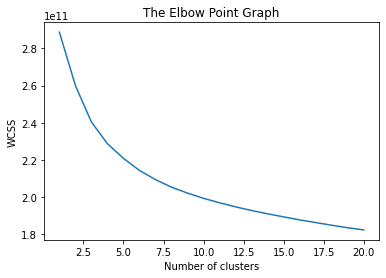

In [5]:
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:
kmeans= KMeans(n_clusters=15)
kmeans.fit(data)

KMeans(n_clusters=15)

In [5]:
#histograms of all the classes

hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])


print('histogram')
print(hist,"\n")


histogram
(array([118264, 103908,  92413, 110681,  94822, 133680, 115787, 124944,
       105284,  85787, 107445, 138975,  94281, 143280, 109737],
      dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])) 



## Dimensionality Reduction

In [6]:
folder=r"C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl"

i=1
for file in os.listdir(folder):
    dest=os.path.join(folder,file)
    k=1
    data=[]
    print(file)
    x=1
    for filename in os.listdir(dest):
        if(k>100):
            print("___________________")
            break
        path=os.path.join(dest,filename)
        a=cv2.imread(path)
    
        #resize image
        resize=(512,512)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        #ORB feature extraction
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(gray, None)
    
        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",x," : ", out.shape)
        x=x+1
        #predict values of feature vector with pretrained kmeans
        #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
        array_double = np.array(out, dtype=np.double)
        a=kmeans.predict(array_double)
        hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
        #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
        data.append(hist[0])
        k=k+1
    #convert Array to Dataframe and append to the list
    Output = pd.DataFrame(data)
    #add row class 
    Output["Class"] = i 
    i=i+1
    csv_data=Output.to_csv('Reduced_ORB.csv', mode='a',header=False,index=False)
        

0
descriptor shape  1  :  (236, 32)
descriptor shape  2  :  (239, 32)
descriptor shape  3  :  (257, 32)
descriptor shape  4  :  (263, 32)
descriptor shape  5  :  (249, 32)
descriptor shape  6  :  (220, 32)
descriptor shape  7  :  (227, 32)
descriptor shape  8  :  (242, 32)
descriptor shape  9  :  (227, 32)
descriptor shape  10  :  (239, 32)
descriptor shape  11  :  (250, 32)
descriptor shape  12  :  (286, 32)
descriptor shape  13  :  (284, 32)
descriptor shape  14  :  (261, 32)
descriptor shape  15  :  (377, 32)
descriptor shape  16  :  (263, 32)
descriptor shape  17  :  (220, 32)
descriptor shape  18  :  (242, 32)
descriptor shape  19  :  (350, 32)
descriptor shape  20  :  (342, 32)
descriptor shape  21  :  (377, 32)
descriptor shape  22  :  (394, 32)
descriptor shape  23  :  (376, 32)
descriptor shape  24  :  (389, 32)
descriptor shape  25  :  (358, 32)
descriptor shape  26  :  (361, 32)
descriptor shape  27  :  (377, 32)
descriptor shape  28  :  (342, 32)
descriptor shape  29  :  (3

descriptor shape  37  :  (500, 32)
descriptor shape  38  :  (500, 32)
descriptor shape  39  :  (494, 32)
descriptor shape  40  :  (500, 32)
descriptor shape  41  :  (500, 32)
descriptor shape  42  :  (500, 32)
descriptor shape  43  :  (500, 32)
descriptor shape  44  :  (500, 32)
descriptor shape  45  :  (500, 32)
descriptor shape  46  :  (500, 32)
descriptor shape  47  :  (500, 32)
descriptor shape  48  :  (500, 32)
descriptor shape  49  :  (483, 32)
descriptor shape  50  :  (500, 32)
descriptor shape  51  :  (495, 32)
descriptor shape  52  :  (500, 32)
descriptor shape  53  :  (500, 32)
descriptor shape  54  :  (500, 32)
descriptor shape  55  :  (490, 32)
descriptor shape  56  :  (500, 32)
descriptor shape  57  :  (500, 32)
descriptor shape  58  :  (500, 32)
descriptor shape  59  :  (493, 32)
descriptor shape  60  :  (500, 32)
descriptor shape  61  :  (360, 32)
descriptor shape  62  :  (355, 32)
descriptor shape  63  :  (338, 32)
descriptor shape  64  :  (354, 32)
descriptor shape  65

descriptor shape  73  :  (356, 32)
descriptor shape  74  :  (399, 32)
descriptor shape  75  :  (343, 32)
descriptor shape  76  :  (447, 32)
descriptor shape  77  :  (469, 32)
descriptor shape  78  :  (459, 32)
descriptor shape  79  :  (379, 32)
descriptor shape  80  :  (423, 32)
descriptor shape  81  :  (401, 32)
descriptor shape  82  :  (387, 32)
descriptor shape  83  :  (420, 32)
descriptor shape  84  :  (415, 32)
descriptor shape  85  :  (383, 32)
descriptor shape  86  :  (453, 32)
descriptor shape  87  :  (485, 32)
descriptor shape  88  :  (452, 32)
descriptor shape  89  :  (365, 32)
descriptor shape  90  :  (438, 32)
descriptor shape  91  :  (390, 32)
descriptor shape  92  :  (396, 32)
descriptor shape  93  :  (400, 32)
descriptor shape  94  :  (393, 32)
descriptor shape  95  :  (356, 32)
descriptor shape  96  :  (441, 32)
descriptor shape  97  :  (469, 32)
descriptor shape  98  :  (437, 32)
descriptor shape  99  :  (353, 32)
descriptor shape  100  :  (433, 32)
___________________

descriptor shape  8  :  (424, 32)
descriptor shape  9  :  (374, 32)
descriptor shape  10  :  (357, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (487, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (471, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (483, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (488, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (466, 32)
descriptor shape  30  :  (488, 32)
descriptor shape  31  :  (500, 32)
descriptor shape  32  :  (500, 32)
descriptor shape  33  :  (500, 32)
descriptor shape  34  :  (491, 32)
descriptor shape  35  :  (474, 32)
descriptor shape  36  

descriptor shape  42  :  (500, 32)
descriptor shape  43  :  (496, 32)
descriptor shape  44  :  (498, 32)
descriptor shape  45  :  (465, 32)
descriptor shape  46  :  (500, 32)
descriptor shape  47  :  (500, 32)
descriptor shape  48  :  (495, 32)
descriptor shape  49  :  (486, 32)
descriptor shape  50  :  (496, 32)
descriptor shape  51  :  (499, 32)
descriptor shape  52  :  (500, 32)
descriptor shape  53  :  (492, 32)
descriptor shape  54  :  (496, 32)
descriptor shape  55  :  (479, 32)
descriptor shape  56  :  (500, 32)
descriptor shape  57  :  (500, 32)
descriptor shape  58  :  (498, 32)
descriptor shape  59  :  (478, 32)
descriptor shape  60  :  (500, 32)
descriptor shape  61  :  (496, 32)
descriptor shape  62  :  (500, 32)
descriptor shape  63  :  (494, 32)
descriptor shape  64  :  (500, 32)
descriptor shape  65  :  (491, 32)
descriptor shape  66  :  (500, 32)
descriptor shape  67  :  (500, 32)
descriptor shape  68  :  (500, 32)
descriptor shape  69  :  (488, 32)
descriptor shape  70

descriptor shape  78  :  (433, 32)
descriptor shape  79  :  (415, 32)
descriptor shape  80  :  (490, 32)
descriptor shape  81  :  (500, 32)
descriptor shape  82  :  (500, 32)
descriptor shape  83  :  (500, 32)
descriptor shape  84  :  (500, 32)
descriptor shape  85  :  (481, 32)
descriptor shape  86  :  (490, 32)
descriptor shape  87  :  (500, 32)
descriptor shape  88  :  (497, 32)
descriptor shape  89  :  (499, 32)
descriptor shape  90  :  (500, 32)
descriptor shape  91  :  (500, 32)
descriptor shape  92  :  (500, 32)
descriptor shape  93  :  (500, 32)
descriptor shape  94  :  (496, 32)
descriptor shape  95  :  (447, 32)
descriptor shape  96  :  (485, 32)
descriptor shape  97  :  (497, 32)
descriptor shape  98  :  (494, 32)
descriptor shape  99  :  (493, 32)
descriptor shape  100  :  (497, 32)
___________________
c
descriptor shape  1  :  (287, 32)
descriptor shape  2  :  (285, 32)
descriptor shape  3  :  (279, 32)
descriptor shape  4  :  (294, 32)
descriptor shape  5  :  (263, 32)
de

descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (500, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (500, 32)
descriptor shape  30  :  (500, 32)
descriptor shape  31  :  (500, 32)
descriptor shape  32  :  (500, 32)
descriptor shape  33  :  (500, 32)
descriptor shape  34  :  (500, 32)
descriptor shape  35  :  (500, 32)
descriptor shape  36  :  (500, 32)
descriptor shape  37  :  (500, 32)
descriptor shape  38  :  (500, 32)
descriptor shape  39

descriptor shape  46  :  (500, 32)
descriptor shape  47  :  (500, 32)
descriptor shape  48  :  (500, 32)
descriptor shape  49  :  (449, 32)
descriptor shape  50  :  (500, 32)
descriptor shape  51  :  (440, 32)
descriptor shape  52  :  (445, 32)
descriptor shape  53  :  (462, 32)
descriptor shape  54  :  (477, 32)
descriptor shape  55  :  (455, 32)
descriptor shape  56  :  (495, 32)
descriptor shape  57  :  (500, 32)
descriptor shape  58  :  (464, 32)
descriptor shape  59  :  (463, 32)
descriptor shape  60  :  (473, 32)
descriptor shape  61  :  (406, 32)
descriptor shape  62  :  (417, 32)
descriptor shape  63  :  (396, 32)
descriptor shape  64  :  (460, 32)
descriptor shape  65  :  (416, 32)
descriptor shape  66  :  (433, 32)
descriptor shape  67  :  (421, 32)
descriptor shape  68  :  (387, 32)
descriptor shape  69  :  (327, 32)
descriptor shape  70  :  (407, 32)
descriptor shape  71  :  (442, 32)
descriptor shape  72  :  (438, 32)
descriptor shape  73  :  (457, 32)
descriptor shape  74

descriptor shape  83  :  (500, 32)
descriptor shape  84  :  (500, 32)
descriptor shape  85  :  (500, 32)
descriptor shape  86  :  (500, 32)
descriptor shape  87  :  (500, 32)
descriptor shape  88  :  (500, 32)
descriptor shape  89  :  (500, 32)
descriptor shape  90  :  (500, 32)
descriptor shape  91  :  (500, 32)
descriptor shape  92  :  (500, 32)
descriptor shape  93  :  (500, 32)
descriptor shape  94  :  (500, 32)
descriptor shape  95  :  (500, 32)
descriptor shape  96  :  (500, 32)
descriptor shape  97  :  (500, 32)
descriptor shape  98  :  (500, 32)
descriptor shape  99  :  (500, 32)
descriptor shape  100  :  (500, 32)
___________________
j
descriptor shape  1  :  (257, 32)
descriptor shape  2  :  (248, 32)
descriptor shape  3  :  (251, 32)
descriptor shape  4  :  (258, 32)
descriptor shape  5  :  (231, 32)
descriptor shape  6  :  (275, 32)
descriptor shape  7  :  (305, 32)
descriptor shape  8  :  (256, 32)
descriptor shape  9  :  (243, 32)
descriptor shape  10  :  (232, 32)
descri

descriptor shape  16  :  (469, 32)
descriptor shape  17  :  (469, 32)
descriptor shape  18  :  (482, 32)
descriptor shape  19  :  (405, 32)
descriptor shape  20  :  (456, 32)
descriptor shape  21  :  (452, 32)
descriptor shape  22  :  (451, 32)
descriptor shape  23  :  (406, 32)
descriptor shape  24  :  (478, 32)
descriptor shape  25  :  (434, 32)
descriptor shape  26  :  (446, 32)
descriptor shape  27  :  (479, 32)
descriptor shape  28  :  (472, 32)
descriptor shape  29  :  (402, 32)
descriptor shape  30  :  (438, 32)
descriptor shape  31  :  (432, 32)
descriptor shape  32  :  (450, 32)
descriptor shape  33  :  (413, 32)
descriptor shape  34  :  (470, 32)
descriptor shape  35  :  (416, 32)
descriptor shape  36  :  (485, 32)
descriptor shape  37  :  (459, 32)
descriptor shape  38  :  (489, 32)
descriptor shape  39  :  (377, 32)
descriptor shape  40  :  (437, 32)
descriptor shape  41  :  (444, 32)
descriptor shape  42  :  (455, 32)
descriptor shape  43  :  (420, 32)
descriptor shape  44

descriptor shape  52  :  (473, 32)
descriptor shape  53  :  (500, 32)
descriptor shape  54  :  (499, 32)
descriptor shape  55  :  (497, 32)
descriptor shape  56  :  (472, 32)
descriptor shape  57  :  (494, 32)
descriptor shape  58  :  (450, 32)
descriptor shape  59  :  (449, 32)
descriptor shape  60  :  (484, 32)
descriptor shape  61  :  (500, 32)
descriptor shape  62  :  (500, 32)
descriptor shape  63  :  (500, 32)
descriptor shape  64  :  (500, 32)
descriptor shape  65  :  (500, 32)
descriptor shape  66  :  (500, 32)
descriptor shape  67  :  (500, 32)
descriptor shape  68  :  (500, 32)
descriptor shape  69  :  (500, 32)
descriptor shape  70  :  (500, 32)
descriptor shape  71  :  (500, 32)
descriptor shape  72  :  (500, 32)
descriptor shape  73  :  (500, 32)
descriptor shape  74  :  (500, 32)
descriptor shape  75  :  (500, 32)
descriptor shape  76  :  (500, 32)
descriptor shape  77  :  (500, 32)
descriptor shape  78  :  (500, 32)
descriptor shape  79  :  (500, 32)
descriptor shape  80

descriptor shape  86  :  (493, 32)
descriptor shape  87  :  (494, 32)
descriptor shape  88  :  (491, 32)
descriptor shape  89  :  (487, 32)
descriptor shape  90  :  (480, 32)
descriptor shape  91  :  (462, 32)
descriptor shape  92  :  (469, 32)
descriptor shape  93  :  (458, 32)
descriptor shape  94  :  (432, 32)
descriptor shape  95  :  (443, 32)
descriptor shape  96  :  (483, 32)
descriptor shape  97  :  (488, 32)
descriptor shape  98  :  (487, 32)
descriptor shape  99  :  (491, 32)
descriptor shape  100  :  (480, 32)
___________________
q
descriptor shape  1  :  (499, 32)
descriptor shape  2  :  (494, 32)
descriptor shape  3  :  (489, 32)
descriptor shape  4  :  (496, 32)
descriptor shape  5  :  (493, 32)
descriptor shape  6  :  (498, 32)
descriptor shape  7  :  (497, 32)
descriptor shape  8  :  (494, 32)
descriptor shape  9  :  (488, 32)
descriptor shape  10  :  (500, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descri

descriptor shape  19  :  (468, 32)
descriptor shape  20  :  (493, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (495, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (497, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (494, 32)
descriptor shape  29  :  (498, 32)
descriptor shape  30  :  (500, 32)
descriptor shape  31  :  (500, 32)
descriptor shape  32  :  (500, 32)
descriptor shape  33  :  (500, 32)
descriptor shape  34  :  (500, 32)
descriptor shape  35  :  (500, 32)
descriptor shape  36  :  (500, 32)
descriptor shape  37  :  (500, 32)
descriptor shape  38  :  (500, 32)
descriptor shape  39  :  (499, 32)
descriptor shape  40  :  (500, 32)
descriptor shape  41  :  (480, 32)
descriptor shape  42  :  (479, 32)
descriptor shape  43  :  (500, 32)
descriptor shape  44  :  (500, 32)
descriptor shape  45  :  (493, 32)
descriptor shape  46  :  (489, 32)
descriptor shape  47

descriptor shape  56  :  (500, 32)
descriptor shape  57  :  (500, 32)
descriptor shape  58  :  (500, 32)
descriptor shape  59  :  (500, 32)
descriptor shape  60  :  (500, 32)
descriptor shape  61  :  (490, 32)
descriptor shape  62  :  (490, 32)
descriptor shape  63  :  (497, 32)
descriptor shape  64  :  (457, 32)
descriptor shape  65  :  (438, 32)
descriptor shape  66  :  (453, 32)
descriptor shape  67  :  (500, 32)
descriptor shape  68  :  (475, 32)
descriptor shape  69  :  (478, 32)
descriptor shape  70  :  (489, 32)
descriptor shape  71  :  (468, 32)
descriptor shape  72  :  (488, 32)
descriptor shape  73  :  (456, 32)
descriptor shape  74  :  (454, 32)
descriptor shape  75  :  (446, 32)
descriptor shape  76  :  (458, 32)
descriptor shape  77  :  (498, 32)
descriptor shape  78  :  (460, 32)
descriptor shape  79  :  (473, 32)
descriptor shape  80  :  (484, 32)
descriptor shape  81  :  (500, 32)
descriptor shape  82  :  (500, 32)
descriptor shape  83  :  (500, 32)
descriptor shape  84

descriptor shape  90  :  (500, 32)
descriptor shape  91  :  (500, 32)
descriptor shape  92  :  (500, 32)
descriptor shape  93  :  (500, 32)
descriptor shape  94  :  (500, 32)
descriptor shape  95  :  (500, 32)
descriptor shape  96  :  (500, 32)
descriptor shape  97  :  (500, 32)
descriptor shape  98  :  (500, 32)
descriptor shape  99  :  (500, 32)
descriptor shape  100  :  (500, 32)
___________________
x
descriptor shape  1  :  (500, 32)
descriptor shape  2  :  (500, 32)
descriptor shape  3  :  (500, 32)
descriptor shape  4  :  (500, 32)
descriptor shape  5  :  (500, 32)
descriptor shape  6  :  (500, 32)
descriptor shape  7  :  (500, 32)
descriptor shape  8  :  (500, 32)
descriptor shape  9  :  (500, 32)
descriptor shape  10  :  (500, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descri

descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (499, 32)
descriptor shape  30  :  (500, 32)
descriptor shape  31  :  (500, 32)
descriptor shape  32  :  (500, 32)
descriptor shape  33  :  (500, 32)
descriptor shape  34  :  (500, 32)
descriptor shape  35  :  (500, 32)
descriptor shape  36  :  (500, 32)
descriptor shape  37  :  (500, 32)
descriptor shape  38  :  (500, 32)
descriptor shape  39  :  (500, 32)
descriptor shape  40  :  (500, 32)
descriptor shape  41  :  (500, 32)
descriptor shape  42  :  (500, 32)
descriptor shape  43  :  (500, 32)
descriptor shape  44  :  (500, 32)
descriptor shape  45  :  (500, 32)
descriptor shape  46  :  (500, 32)
descriptor shape  47  :  (500, 32)
descriptor shape  48  :  (500, 32)
descriptor shape  49  :  (500, 32)
descriptor shape  50  :  (500, 32)
descriptor shape  51  :  (500, 32)
descriptor shape  52  :  (500, 32)
descriptor shape  53  :  (500, 32)
descriptor shape  54  :  (498, 32)
descriptor shape  55

In [7]:
data= pd.read_csv(r'Reduced_ORB.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3,7,5,14,4,33,28,50,11,1,11,23,11,30,5,1
1,3,7,6,15,4,44,25,50,16,4,9,17,7,23,9,1
2,5,10,10,18,14,34,22,38,20,3,12,11,16,28,16,1
3,2,9,6,14,10,32,30,45,24,1,15,22,20,23,10,1
4,6,10,7,16,9,35,34,42,20,1,13,14,16,21,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,22,17,8,19,25,43,43,33,21,15,25,11,20,50,41,36
3596,24,24,12,32,32,47,33,34,34,17,35,9,22,57,38,36
3597,18,13,12,25,29,44,24,41,38,12,29,14,18,48,35,36
3598,22,20,10,22,15,42,33,25,26,14,15,16,13,40,37,36


## PCA

In [8]:
data.drop(data.columns[[15]], axis = 1, inplace = True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3,7,5,14,4,33,28,50,11,1,11,23,11,30,5
1,3,7,6,15,4,44,25,50,16,4,9,17,7,23,9
2,5,10,10,18,14,34,22,38,20,3,12,11,16,28,16
3,2,9,6,14,10,32,30,45,24,1,15,22,20,23,10
4,6,10,7,16,9,35,34,42,20,1,13,14,16,21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,22,17,8,19,25,43,43,33,21,15,25,11,20,50,41
3596,24,24,12,32,32,47,33,34,34,17,35,9,22,57,38
3597,18,13,12,25,29,44,24,41,38,12,29,14,18,48,35
3598,22,20,10,22,15,42,33,25,26,14,15,16,13,40,37


In [9]:
scalar= StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(data))

df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2.103072,-1.769502,-1.665641,-1.370086,-1.638694,-0.260924,-0.287225,0.569769,-1.244640,-1.889044,-1.570563,-0.852321,-1.479460,-0.648576,-1.770649
1,-2.103072,-1.769502,-1.585060,-1.288264,-1.638694,0.433471,-0.494207,0.569769,-0.903560,-1.640809,-1.737238,-1.180049,-1.869069,-1.111845,-1.492709
2,-1.962167,-1.526698,-1.262734,-1.042798,-0.905151,-0.197797,-0.701188,0.122696,-0.630695,-1.723554,-1.487225,-1.507777,-0.992448,-0.780939,-1.006315
3,-2.173524,-1.607633,-1.585060,-1.370086,-1.198568,-0.324051,-0.149237,0.383489,-0.357831,-1.889044,-1.237213,-0.906942,-0.602839,-1.111845,-1.423225
4,-1.891715,-1.526698,-1.504478,-1.206442,-1.271922,-0.134670,0.126738,0.271721,-0.630695,-1.889044,-1.403888,-1.343913,-0.992448,-1.244207,-1.770649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,-0.764483,-0.960155,-1.423897,-0.960976,-0.098254,0.370344,0.747682,-0.063584,-0.562479,-0.730615,-0.403839,-1.507777,-0.602839,0.675049,0.730807
3596,-0.623579,-0.393612,-1.101571,0.102709,0.415226,0.622851,0.057744,-0.026328,0.324329,-0.565125,0.429535,-1.617020,-0.408035,1.138317,0.522353
3597,-1.046291,-1.283894,-1.101571,-0.470044,0.195163,0.433471,-0.563200,0.234465,0.597194,-0.978850,-0.070490,-1.343913,-0.797644,0.542686,0.313898
3598,-0.764483,-0.717351,-1.262734,-0.715510,-0.831797,0.307217,0.057744,-0.361632,-0.221399,-0.813360,-1.237213,-1.234671,-1.284655,0.013236,0.452868


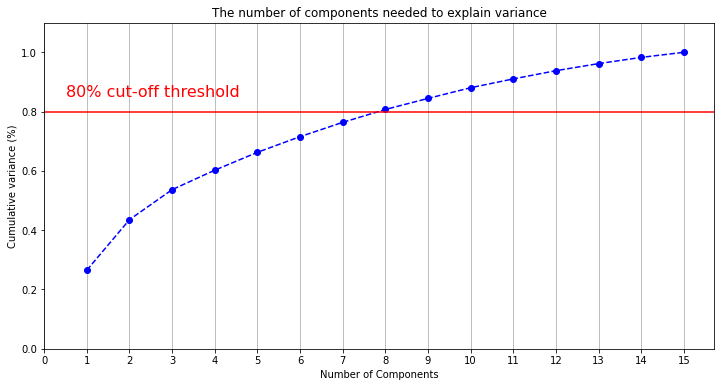

In [10]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_scaled)

#% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 16, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 16, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Text(0, 0.5, 'Explained Varience')

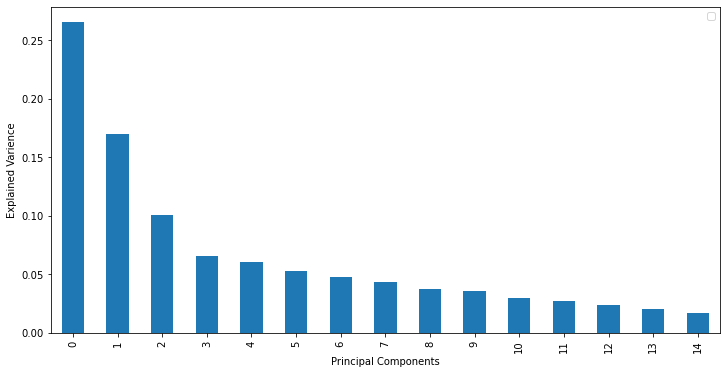

In [11]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')

In [12]:
N_pca = PCA(n_components = 8)
PC=N_pca.fit(df_scaled)
PC

PCA(n_components=8)

In [14]:
folder=r"C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl"

i=1
for file in os.listdir(folder):
    dest=os.path.join(folder,file)
    k=1
    vector=[]
    print(file)
    x=1
    for filename in os.listdir(dest):
        if(k>100):
            print("___________________")
            break
        path=os.path.join(dest,filename)
        a=cv2.imread(path)
    
        #resize image
        resize=(512,512)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        #ORB feature extraction
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(gray, None)
    
        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",x," : ", out.shape)
        x=x+1
        #predict values of feature vector with pretrained kmeans
        #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
        array_double = np.array(out, dtype=np.double)
        a=kmeans.predict(array_double)
        hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
        #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
        a=pd.DataFrame(hist[0])
        a=a.transpose()
        
        
        df=pd.DataFrame(scalar.transform(a))
        
        
        PC = N_pca.transform(df)
        
        Data = pd.DataFrame(data = PC)
        
        data=Data.values
        data=data[0]
        vector.append(data)
        k=k+1
    #convert Array to Dataframe and append to the list
    
    Output = pd.DataFrame(vector)
    print(Output)
    #add row class 
    Output["Class"] = i 
    i=i+1
    csv_data=Output.to_csv('Reduced_PCA_ORB.csv', mode='a',header=False,index=False)

0
descriptor shape  1  :  (236, 32)
descriptor shape  2  :  (239, 32)
descriptor shape  3  :  (257, 32)
descriptor shape  4  :  (263, 32)
descriptor shape  5  :  (249, 32)
descriptor shape  6  :  (220, 32)
descriptor shape  7  :  (227, 32)
descriptor shape  8  :  (242, 32)
descriptor shape  9  :  (227, 32)
descriptor shape  10  :  (239, 32)
descriptor shape  11  :  (250, 32)
descriptor shape  12  :  (286, 32)
descriptor shape  13  :  (284, 32)
descriptor shape  14  :  (261, 32)
descriptor shape  15  :  (377, 32)
descriptor shape  16  :  (263, 32)
descriptor shape  17  :  (220, 32)
descriptor shape  18  :  (242, 32)
descriptor shape  19  :  (350, 32)
descriptor shape  20  :  (342, 32)
descriptor shape  21  :  (377, 32)
descriptor shape  22  :  (394, 32)
descriptor shape  23  :  (376, 32)
descriptor shape  24  :  (389, 32)
descriptor shape  25  :  (358, 32)
descriptor shape  26  :  (361, 32)
descriptor shape  27  :  (377, 32)
descriptor shape  28  :  (342, 32)
descriptor shape  29  :  (3

descriptor shape  2  :  (449, 32)
descriptor shape  3  :  (470, 32)
descriptor shape  4  :  (473, 32)
descriptor shape  5  :  (446, 32)
descriptor shape  6  :  (491, 32)
descriptor shape  7  :  (500, 32)
descriptor shape  8  :  (484, 32)
descriptor shape  9  :  (433, 32)
descriptor shape  10  :  (468, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (500, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (500, 32)
descriptor shape  30  :  (50

descriptor shape  2  :  (442, 32)
descriptor shape  3  :  (454, 32)
descriptor shape  4  :  (437, 32)
descriptor shape  5  :  (395, 32)
descriptor shape  6  :  (489, 32)
descriptor shape  7  :  (489, 32)
descriptor shape  8  :  (479, 32)
descriptor shape  9  :  (396, 32)
descriptor shape  10  :  (452, 32)
descriptor shape  11  :  (494, 32)
descriptor shape  12  :  (498, 32)
descriptor shape  13  :  (495, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (458, 32)
descriptor shape  16  :  (497, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (479, 32)
descriptor shape  20  :  (484, 32)
descriptor shape  21  :  (499, 32)
descriptor shape  22  :  (499, 32)
descriptor shape  23  :  (499, 32)
descriptor shape  24  :  (495, 32)
descriptor shape  25  :  (485, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (497, 32)
descriptor shape  29  :  (494, 32)
descriptor shape  30  :  (49

descriptor shape  1  :  (495, 32)
descriptor shape  2  :  (498, 32)
descriptor shape  3  :  (485, 32)
descriptor shape  4  :  (500, 32)
descriptor shape  5  :  (492, 32)
descriptor shape  6  :  (500, 32)
descriptor shape  7  :  (500, 32)
descriptor shape  8  :  (500, 32)
descriptor shape  9  :  (499, 32)
descriptor shape  10  :  (500, 32)
descriptor shape  11  :  (491, 32)
descriptor shape  12  :  (493, 32)
descriptor shape  13  :  (482, 32)
descriptor shape  14  :  (499, 32)
descriptor shape  15  :  (441, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (468, 32)
descriptor shape  20  :  (489, 32)
descriptor shape  21  :  (482, 32)
descriptor shape  22  :  (483, 32)
descriptor shape  23  :  (491, 32)
descriptor shape  24  :  (492, 32)
descriptor shape  25  :  (428, 32)
descriptor shape  26  :  (487, 32)
descriptor shape  27  :  (485, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (443

descriptor shape  2  :  (384, 32)
descriptor shape  3  :  (361, 32)
descriptor shape  4  :  (388, 32)
descriptor shape  5  :  (332, 32)
descriptor shape  6  :  (454, 32)
descriptor shape  7  :  (440, 32)
descriptor shape  8  :  (453, 32)
descriptor shape  9  :  (357, 32)
descriptor shape  10  :  (398, 32)
descriptor shape  11  :  (492, 32)
descriptor shape  12  :  (483, 32)
descriptor shape  13  :  (455, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (466, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (454, 32)
descriptor shape  20  :  (488, 32)
descriptor shape  21  :  (473, 32)
descriptor shape  22  :  (457, 32)
descriptor shape  23  :  (442, 32)
descriptor shape  24  :  (481, 32)
descriptor shape  25  :  (441, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (492, 32)
descriptor shape  29  :  (438, 32)
descriptor shape  30  :  (48

descriptor shape  4  :  (425, 32)
descriptor shape  5  :  (377, 32)
descriptor shape  6  :  (440, 32)
descriptor shape  7  :  (452, 32)
descriptor shape  8  :  (401, 32)
descriptor shape  9  :  (355, 32)
descriptor shape  10  :  (399, 32)
descriptor shape  11  :  (493, 32)
descriptor shape  12  :  (493, 32)
descriptor shape  13  :  (492, 32)
descriptor shape  14  :  (496, 32)
descriptor shape  15  :  (485, 32)
descriptor shape  16  :  (499, 32)
descriptor shape  17  :  (490, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (491, 32)
descriptor shape  20  :  (493, 32)
descriptor shape  21  :  (469, 32)
descriptor shape  22  :  (461, 32)
descriptor shape  23  :  (475, 32)
descriptor shape  24  :  (497, 32)
descriptor shape  25  :  (465, 32)
descriptor shape  26  :  (476, 32)
descriptor shape  27  :  (479, 32)
descriptor shape  28  :  (494, 32)
descriptor shape  29  :  (422, 32)
descriptor shape  30  :  (485, 32)
descriptor shape  31  :  (498, 32)
descriptor shape  32  :  (

descriptor shape  1  :  (287, 32)
descriptor shape  2  :  (285, 32)
descriptor shape  3  :  (279, 32)
descriptor shape  4  :  (294, 32)
descriptor shape  5  :  (263, 32)
descriptor shape  6  :  (360, 32)
descriptor shape  7  :  (368, 32)
descriptor shape  8  :  (335, 32)
descriptor shape  9  :  (286, 32)
descriptor shape  10  :  (360, 32)
descriptor shape  11  :  (342, 32)
descriptor shape  12  :  (353, 32)
descriptor shape  13  :  (373, 32)
descriptor shape  14  :  (358, 32)
descriptor shape  15  :  (337, 32)
descriptor shape  16  :  (423, 32)
descriptor shape  17  :  (395, 32)
descriptor shape  18  :  (386, 32)
descriptor shape  19  :  (360, 32)
descriptor shape  20  :  (380, 32)
descriptor shape  21  :  (288, 32)
descriptor shape  22  :  (273, 32)
descriptor shape  23  :  (290, 32)
descriptor shape  24  :  (301, 32)
descriptor shape  25  :  (251, 32)
descriptor shape  26  :  (362, 32)
descriptor shape  27  :  (342, 32)
descriptor shape  28  :  (337, 32)
descriptor shape  29  :  (297

descriptor shape  6  :  (500, 32)
descriptor shape  7  :  (500, 32)
descriptor shape  8  :  (500, 32)
descriptor shape  9  :  (486, 32)
descriptor shape  10  :  (500, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (500, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (500, 32)
descriptor shape  30  :  (500, 32)
descriptor shape  31  :  (500, 32)
descriptor shape  32  :  (500, 32)
descriptor shape  33  :  (500, 32)
descriptor shape  34  : 

descriptor shape  5  :  (316, 32)
descriptor shape  6  :  (402, 32)
descriptor shape  7  :  (348, 32)
descriptor shape  8  :  (348, 32)
descriptor shape  9  :  (281, 32)
descriptor shape  10  :  (308, 32)
descriptor shape  11  :  (469, 32)
descriptor shape  12  :  (464, 32)
descriptor shape  13  :  (474, 32)
descriptor shape  14  :  (491, 32)
descriptor shape  15  :  (474, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (491, 32)
descriptor shape  19  :  (450, 32)
descriptor shape  20  :  (486, 32)
descriptor shape  21  :  (464, 32)
descriptor shape  22  :  (480, 32)
descriptor shape  23  :  (454, 32)
descriptor shape  24  :  (493, 32)
descriptor shape  25  :  (472, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (495, 32)
descriptor shape  29  :  (454, 32)
descriptor shape  30  :  (474, 32)
descriptor shape  31  :  (472, 32)
descriptor shape  32  :  (482, 32)
descriptor shape  33  :  

descriptor shape  6  :  (473, 32)
descriptor shape  7  :  (365, 32)
descriptor shape  8  :  (461, 32)
descriptor shape  9  :  (332, 32)
descriptor shape  10  :  (378, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (499, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (489, 32)
descriptor shape  22  :  (495, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (500, 32)
descriptor shape  30  :  (500, 32)
descriptor shape  31  :  (500, 32)
descriptor shape  32  :  (500, 32)
descriptor shape  33  :  (500, 32)
descriptor shape  34  : 

descriptor shape  1  :  (454, 32)
descriptor shape  2  :  (463, 32)
descriptor shape  3  :  (457, 32)
descriptor shape  4  :  (469, 32)
descriptor shape  5  :  (447, 32)
descriptor shape  6  :  (453, 32)
descriptor shape  7  :  (485, 32)
descriptor shape  8  :  (465, 32)
descriptor shape  9  :  (435, 32)
descriptor shape  10  :  (440, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (500, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (500

descriptor shape  3  :  (355, 32)
descriptor shape  4  :  (400, 32)
descriptor shape  5  :  (352, 32)
descriptor shape  6  :  (390, 32)
descriptor shape  7  :  (378, 32)
descriptor shape  8  :  (388, 32)
descriptor shape  9  :  (343, 32)
descriptor shape  10  :  (372, 32)
descriptor shape  11  :  (493, 32)
descriptor shape  12  :  (476, 32)
descriptor shape  13  :  (498, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (488, 32)
descriptor shape  16  :  (498, 32)
descriptor shape  17  :  (497, 32)
descriptor shape  18  :  (469, 32)
descriptor shape  19  :  (463, 32)
descriptor shape  20  :  (496, 32)
descriptor shape  21  :  (478, 32)
descriptor shape  22  :  (475, 32)
descriptor shape  23  :  (496, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (491, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (494, 32)
descriptor shape  28  :  (493, 32)
descriptor shape  29  :  (449, 32)
descriptor shape  30  :  (490, 32)
descriptor shape  31  :  (5

descriptor shape  3  :  (356, 32)
descriptor shape  4  :  (347, 32)
descriptor shape  5  :  (366, 32)
descriptor shape  6  :  (452, 32)
descriptor shape  7  :  (428, 32)
descriptor shape  8  :  (413, 32)
descriptor shape  9  :  (360, 32)
descriptor shape  10  :  (404, 32)
descriptor shape  11  :  (353, 32)
descriptor shape  12  :  (361, 32)
descriptor shape  13  :  (373, 32)
descriptor shape  14  :  (379, 32)
descriptor shape  15  :  (349, 32)
descriptor shape  16  :  (441, 32)
descriptor shape  17  :  (422, 32)
descriptor shape  18  :  (422, 32)
descriptor shape  19  :  (374, 32)
descriptor shape  20  :  (377, 32)
descriptor shape  21  :  (329, 32)
descriptor shape  22  :  (334, 32)
descriptor shape  23  :  (356, 32)
descriptor shape  24  :  (369, 32)
descriptor shape  25  :  (336, 32)
descriptor shape  26  :  (414, 32)
descriptor shape  27  :  (382, 32)
descriptor shape  28  :  (387, 32)
descriptor shape  29  :  (314, 32)
descriptor shape  30  :  (345, 32)
descriptor shape  31  :  (3

descriptor shape  6  :  (498, 32)
descriptor shape  7  :  (497, 32)
descriptor shape  8  :  (494, 32)
descriptor shape  9  :  (488, 32)
descriptor shape  10  :  (500, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (500, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (500, 32)
descriptor shape  30  :  (500, 32)
descriptor shape  31  :  (500, 32)
descriptor shape  32  :  (495, 32)
descriptor shape  33  :  (500, 32)
descriptor shape  34  : 

descriptor shape  1  :  (473, 32)
descriptor shape  2  :  (472, 32)
descriptor shape  3  :  (414, 32)
descriptor shape  4  :  (478, 32)
descriptor shape  5  :  (440, 32)
descriptor shape  6  :  (493, 32)
descriptor shape  7  :  (485, 32)
descriptor shape  8  :  (471, 32)
descriptor shape  9  :  (397, 32)
descriptor shape  10  :  (463, 32)
descriptor shape  11  :  (495, 32)
descriptor shape  12  :  (498, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (487, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (477, 32)
descriptor shape  19  :  (468, 32)
descriptor shape  20  :  (493, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (495, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (497, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (494, 32)
descriptor shape  29  :  (498

descriptor shape  5  :  (498, 32)
descriptor shape  6  :  (500, 32)
descriptor shape  7  :  (500, 32)
descriptor shape  8  :  (500, 32)
descriptor shape  9  :  (491, 32)
descriptor shape  10  :  (500, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (500, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (500, 32)
descriptor shape  30  :  (500, 32)
descriptor shape  31  :  (500, 32)
descriptor shape  32  :  (500, 32)
descriptor shape  33  :  

descriptor shape  5  :  (500, 32)
descriptor shape  6  :  (500, 32)
descriptor shape  7  :  (500, 32)
descriptor shape  8  :  (500, 32)
descriptor shape  9  :  (491, 32)
descriptor shape  10  :  (500, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (500, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 32)
descriptor shape  29  :  (487, 32)
descriptor shape  30  :  (500, 32)
descriptor shape  31  :  (500, 32)
descriptor shape  32  :  (500, 32)
descriptor shape  33  :  

descriptor shape  4  :  (441, 32)
descriptor shape  5  :  (388, 32)
descriptor shape  6  :  (452, 32)
descriptor shape  7  :  (451, 32)
descriptor shape  8  :  (474, 32)
descriptor shape  9  :  (379, 32)
descriptor shape  10  :  (411, 32)
descriptor shape  11  :  (443, 32)
descriptor shape  12  :  (463, 32)
descriptor shape  13  :  (448, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (460, 32)
descriptor shape  16  :  (488, 32)
descriptor shape  17  :  (499, 32)
descriptor shape  18  :  (476, 32)
descriptor shape  19  :  (439, 32)
descriptor shape  20  :  (467, 32)
descriptor shape  21  :  (421, 32)
descriptor shape  22  :  (443, 32)
descriptor shape  23  :  (445, 32)
descriptor shape  24  :  (493, 32)
descriptor shape  25  :  (407, 32)
descriptor shape  26  :  (480, 32)
descriptor shape  27  :  (495, 32)
descriptor shape  28  :  (488, 32)
descriptor shape  29  :  (422, 32)
descriptor shape  30  :  (476, 32)
descriptor shape  31  :  (444, 32)
descriptor shape  32  :  (

## PCA Reduced

In [12]:
data= pd.read_csv(r'Reduced_PCA_ORB.csv',header=None)

data

,0,1,2,3,4,5,6,7,8
0,3.423106,-1.557961,2.456290,-2.214751,-0.019692,-0.487356,1.379872,0.157422,1
1,3.102661,-1.519823,2.695011,-2.681998,0.015617,-0.386162,1.451475,-0.191230,1
2,2.396632,-1.792172,2.397198,-1.607001,0.043474,-0.107441,1.163628,-0.522116,1
3,3.192275,-1.519327,2.219904,-1.492979,0.047687,-0.391348,0.942598,-0.459691,1
4,3.269490,-1.564714,2.026473,-1.739108,0.081269,-0.400477,1.427724,-0.128312,1
...,...,...,...,...,...,...,...,...,...
3595,0.945524,-1.830384,0.779026,-1.018263,-0.980999,-0.551403,0.426124,0.171208,36
3596,-0.189931,-1.431717,0.115259,-0.439832,-1.467509,-0.161355,0.609739,-0.467556,36
3597,0.247698,-1.654342,1.320324,-0.743381,-1.035497,-0.565463,0.757854,-0.887736,36
3598,0.818740,-1.708346,1.328948,-1.732270,-0.389873,0.057823,0.402390,0.243764,36


## Train & Test

In [13]:
#assigning x the columns from 0 to 5 for training
x = data.iloc[:, 0:8]
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,8]
print("Y values")
print(y)

X values
             0         1         2         3         4         5         6  \
0     3.423106 -1.557961  2.456290 -2.214751 -0.019692 -0.487356  1.379872   
1     3.102661 -1.519823  2.695011 -2.681998  0.015617 -0.386162  1.451475   
2     2.396632 -1.792172  2.397198 -1.607001  0.043474 -0.107441  1.163628   
3     3.192275 -1.519327  2.219904 -1.492979  0.047687 -0.391348  0.942598   
4     3.269490 -1.564714  2.026473 -1.739108  0.081269 -0.400477  1.427724   
...        ...       ...       ...       ...       ...       ...       ...   
3595  0.945524 -1.830384  0.779026 -1.018263 -0.980999 -0.551403  0.426124   
3596 -0.189931 -1.431717  0.115259 -0.439832 -1.467509 -0.161355  0.609739   
3597  0.247698 -1.654342  1.320324 -0.743381 -1.035497 -0.565463  0.757854   
3598  0.818740 -1.708346  1.328948 -1.732270 -0.389873  0.057823  0.402390   
3599  1.218518 -1.543316  1.268258 -1.811873 -1.009729 -0.070850  0.569744   

             7  
0     0.157422  
1    -0.191230  
2  

In [14]:
#standard scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [15]:
#Dataset split into train and test with 80% Training and 20% Testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

## SVM

In [16]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

from sklearn import svm

#Create a svm Classifier
model1 = svm.SVC(kernel='linear',decision_function_shape='ovo')
#n_classes * (n_classes - 1) / 2
model2 = svm.SVC(kernel='rbf',decision_function_shape='ovo')

model3 = svm.SVC(kernel='poly',decision_function_shape='ovo')

#Train the model using the training sets
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

#Predict the response for test dataset
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
#Results
print("SVM Results")

print("SVM Linear: Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")

print("SVM Poly: Accuracy: ",accuracy_score(y_test, y_pred3)*100,"%")

print("SVM rbf: Accuracy: ",accuracy_score(y_test, y_pred2)*100,"%")

SVM Results
SVM Linear: Accuracy:  74.58333333333333 %
SVM Poly: Accuracy:  82.77777777777777 %
SVM rbf: Accuracy:  87.91666666666667 %


## KNN

In [17]:
#library
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [18]:
error_rate = []
# Will take some time
for i in range(1,20):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [19]:
for i in error_rate:
    print(i)

0.125
0.1361111111111111
0.12638888888888888
0.125
0.10833333333333334
0.10833333333333334
0.10694444444444444
0.10972222222222222
0.11527777777777778
0.1125
0.11527777777777778
0.12222222222222222
0.12361111111111112
0.12083333333333333
0.125
0.12361111111111112
0.12638888888888888
0.13055555555555556
0.13472222222222222


Text(0, 0.5, 'Error Rate')

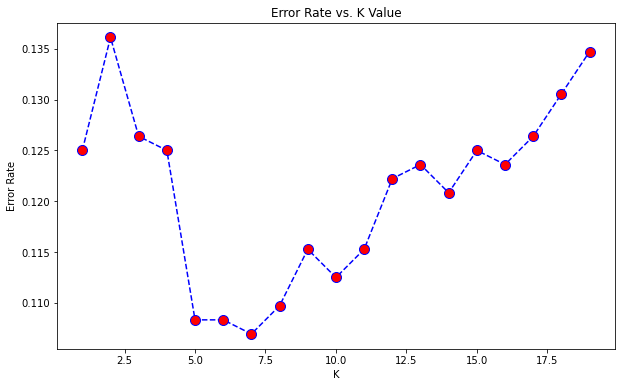

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score


#Create a svm Classifier
model4 = neighbors.KNeighborsClassifier(n_neighbors = 7)

#Train the model using the training sets
model4.fit(x_train,y_train)

#Predict the response for test dataset
pred=model4.predict(x_test) 
#Results
print("KNN Results")
print("KNN: Accuracy: ",accuracy_score(y_test, pred)*100,"%")

KNN Results
KNN: Accuracy:  89.30555555555556 %


## DT

In [22]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dec_tree=DecisionTreeClassifier()

pipe = Pipeline(steps=[('dec_tree', dec_tree)])

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)


clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print()
print(clf_GS.best_estimator_.get_params()['dec_tree'])


Best Criterion: entropy
Best max_depth: 12

DecisionTreeClassifier(criterion='entropy', max_depth=12)


In [23]:
#DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            #max_features=None, max_leaf_nodes=None,
            #min_impurity_decrease=0.0, min_impurity_split=None,
            #min_samples_leaf=1, min_samples_split=2,
            #min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            #splitter='best')

model5 = DecisionTreeClassifier(criterion='entropy',max_depth=12)

# Train Decision Tree Classifer
model5.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model5.predict(x_test)

print("DT Results")

print("DT: Accuracy: ",accuracy_score(y_test, y_pred)*100,"%")

DT Results
DT: Accuracy:  69.58333333333333 %


## Random Forest

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [27]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'bootstrap': True, 'max_depth': 110, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


In [25]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators = 300,min_samples_split=8,min_samples_leaf=3,max_features=2,max_depth=110,bootstrap=True)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model6.fit(x_train, y_train)
  
# performing predictions on the test dataset
y_pred = model6.predict(x_test)

print("RF Results")

print("RF: Accuracy: ",accuracy_score(y_test, y_pred)*100,"%")

RF Results
RF: Accuracy:  87.91666666666667 %


## Adaboost 

In [26]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model7 = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model7.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 55.55555555555556 %


## Classification

In [41]:
#Recognition &Validation
#Assigning path with class class image
path=r"C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_29_rotate_6.jpeg"
a=cv2.imread(path)
    
#resize image
resize=(512,512)
img=cv2.resize(a,resize)#resize image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#ORB feature extraction
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray, None)
    
#convert the descriptor array into a dataframe format
out=pd.DataFrame(descriptors)
print("descriptor shape ",x," : ", out.shape)
x=x+1
#predict values of feature vector with pretrained kmeans
#ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
array_double = np.array(out, dtype=np.double)
a=kmeans.predict(array_double)
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
a=pd.DataFrame(hist[0])
a=a.transpose()
        
        
df=pd.DataFrame(scalar.transform(a))
        
        
PC = N_pca.transform(df)
        
Data = pd.DataFrame(data = PC)
        
data=Data.values
data=data[0]
data

values
   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0  24  32  46  34  17   8  17  37  91  48  22  10  21   5  27


In [42]:
x = data.iloc[:, 0:8]



#prediction
y_pred1 = model1.predict(x)
y_pred2 = model2.predict(x)
y_pred3 = model3.predict(x)
y_pred4 = model4.predict(x)
y_pred5 = model5.predict(x)
y_pred6 = model6.predict(x)
y_pred7 = model7.predict(x)

print("SVM Linear:",y_pred1)
print("\nSVM RBF:",y_pred2)
print("\nSVM Poly:",y_pred3)
print("\nKNN:",y_pred4)
print("\nDT:",y_pred5)
print("\nRF:",y_pred6)
print("\nAdaboost:",y_pred7)

SVM Linear: [34]

SVM RBF: [34]

SVM Poly: [34]

KNN: [34]

DT: [31]

RF: [14]

Adaboost: [12]
